In [265]:
# load the library for path
from pathlib import Path
import pandas as pd
import openpyxl as xl
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as ax1
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import *

In [266]:
# import data set
data_dir = Path('../datathon')

# read xlsx data set
df = pd.read_csv(data_dir/'Total Online Job Vacancy1.csv', index_col = [0], parse_dates=[0])

# remove all the empty column
df = df.dropna(axis=1, how='all')
df.dropna(inplace=True)

# read data set
df_unemployment = pd.read_csv(data_dir /'Unemployment Rate.csv')

# remove the empty columns
df_unemployment = df_unemployment.dropna(axis=1, how='all')

# change the type of df_employment as data frame
df_unemployment = pd.DataFrame(df_unemployment)

# change all the data in df_unemployment to float data except the date
df_unemployment.iloc[:,1:] = df_unemployment.iloc[:,1:].astype(float)
df_unemployment.iloc[:,0] = pd.to_datetime(df_unemployment.iloc[:,0])

In [267]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              18 non-null     object 
 1   Johor             18 non-null     float64
 2   Kedah             18 non-null     float64
 3   Kelantan          18 non-null     float64
 4   Melaka            18 non-null     float64
 5   Negeri Sembilan   18 non-null     float64
 6   Pahang            18 non-null     float64
 7   Pulau Pinang      18 non-null     float64
 8   Perak             18 non-null     float64
 9   Perlis            18 non-null     float64
 10  Selangor          18 non-null     float64
 11  Terengganu        18 non-null     float64
 12  Sabah             18 non-null     float64
 13  Sarawak           18 non-null     float64
 14  W.P Kuala Lumpur  18 non-null     float64
 15  W.P Labuan        18 non-null     float64
 16  W.P Putrajaya     18 non-null     float64
 17 

# Function for ETS and ARIMA test

In [268]:
data.head(n = len(data))


,Negeri Sembilan
0,1.7
1,1.3
2,1.6
3,1.6
4,1.2
5,2.2
6,2.5
7,3.7
8,3.6
9,3.6


In [269]:
data = df_unemployment['Negeri Sembilan']
data = df_unemployment['Negeri Sembilan'].astype(float)
data = pd.DataFrame(data)
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=None, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
stepwise_model.fit(data)
arima_pred = stepwise_model.predict(n_periods=len(data))

Performing stepwise search to minimize aic


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=10.000, Time=0.29 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=11.734, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=14.090, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=22.470, Time=0.00 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=8.000, Time=0.15 sec


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=10.000, Time=0.25 sec


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=12.000, Time=0.26 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=11.043, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=12.090, Time=0.02 sec


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=10.000, Time=0.35 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=12.565, Time=0.09 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=16.052, Time=0.51 sec
 ARIMA(1,0,1)(0,1,0)[12]             : AIC=18.434, Time=0.24 sec

Best model:  ARIMA(1,0,1)(0,1,0)[12] intercept
Total fit time: 2.985 seconds


ValueError: Input contains NaN.

In [ ]:
def ets_fore(data):
    # ets test
    ets_model = ExponentialSmoothing(df_unemployment, trend='add', seasonal='add', seasonal_periods=12)
    ets_model_fit = ets_model.fit()
    ets_pred = ets_model_fit.forecast(12)
    return ets_pred

def ARIMA_fore(data):
    # arima test
    stepwise_model = auto_arima(data, start_p=1, start_q=1,
                                max_p=3, max_q=3, m=12,
                                start_P=0, seasonal=True,
                                d=None, D=1, trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)
    stepwise_model.fit(data)
    arima_pred = stepwise_model.predict(n_periods=12)
    return arima_pred

# Unemployment Rate 

In [ ]:
UETS_Johor = ExponentialSmoothing(df_unemployment['Johor'], trend='mul', seasonal='mul', seasonal_periods=6)
uets_johor_model_fit = UETS_Johor.fit()
uets_johor_pred = uets_johor_model_fit.forecast(12)

UETS_Kedah = ExponentialSmoothing(df_unemployment['Kedah'], trend='mul', seasonal='mul', seasonal_periods=6)
uets_kedah_model_fit = UETS_Kedah.fit()
uets_kedah_pred = uets_kedah_model_fit.forecast(12)

UETS_Kelantan = ExponentialSmoothing(df_unemployment['Kelantan'], trend='mul', seasonal='mul', seasonal_periods=6)
uets_kelantan_model_fit = UETS_Kelantan.fit()
uets_kelantan_pred = uets_kelantan_model_fit.forecast(12)

UETS_Melaka = ExponentialSmoothing(df_unemployment['Melaka'], trend='add', seasonal='mul', seasonal_periods=6)
uets_melaka_model_fit = UETS_Melaka.fit()
uets_melaka_pred = uets_melaka_model_fit.forecast(12)

UETS_Pahang = ExponentialSmoothing(df_unemployment['Pahang'], trend='mul', seasonal='add', seasonal_periods=6)
uets_pahang_model_fit = UETS_Pahang.fit()
uets_pahang_pred = uets_pahang_model_fit.forecast(12)

UETS_Perak = ExponentialSmoothing(df_unemployment['Perak'], trend='mul', seasonal='add', seasonal_periods=6)
uets_perak_model_fit = UETS_Perak.fit()
uets_perak_pred = uets_perak_model_fit.forecast(12)

UETS_Perlis = ExponentialSmoothing(df_unemployment['Perlis'], trend='mul', seasonal='add', seasonal_periods=6)
uets_perlis_model_fit = UETS_Perlis.fit()
uets_perlis_pred = uets_perlis_model_fit.forecast(12)

UETS_Sabah = ExponentialSmoothing(df_unemployment['Sabah'], trend='add', seasonal='add', seasonal_periods=6)
uets_sabah_model_fit = UETS_Sabah.fit()
uets_sabah_pred = uets_sabah_model_fit.forecast(12)

UETS_Sarawak = ExponentialSmoothing(df_unemployment['Sarawak'], trend='mul', seasonal='mul', seasonal_periods=6)
uets_sarawak_model_fit = UETS_Sarawak.fit()
uets_sarawak_pred = uets_sarawak_model_fit.forecast(12)

UETS_Selangor = ExponentialSmoothing(df_unemployment['Selangor'], trend='mul', seasonal='mul', seasonal_periods=6)
uets_selangor_model_fit = UETS_Selangor.fit()
uets_selangor_pred = uets_selangor_model_fit.forecast(12)

UETS_Terengganu = ExponentialSmoothing(df_unemployment['Terengganu'], trend='add', seasonal='mul', seasonal_periods=6)
uets_terengganu_model_fit = UETS_Terengganu.fit()
uets_terengganu_pred = uets_terengganu_model_fit.forecast(12)

UETS_Labuan = ExponentialSmoothing(df_unemployment['W.P Labuan'], trend='mul', seasonal='mul', seasonal_periods=6)
uets_labuan_model_fit = UETS_Labuan.fit()
uets_labuan_pred = uets_labuan_model_fit.forecast(12)

In [ ]:
# Change the data type of df_unemployment as data frame
df_unemployment = pd.DataFrame(df_unemployment) 
df_unemployment.iloc[:,1:] = df_unemployment.iloc[:,1:].astype(float)
df_unemployment.iloc[:,0] = pd.to_datetime(df_unemployment.iloc[:,0])
df_unemployment.head(5)

In [ ]:
# Change the data to float type except the date column
df.iloc[:,1:] = df.iloc[:,1:].astype(float64)
df.iloc[:,0] = pd.to_datetime(df.iloc[:,0])

In [ ]:
UARIMA_KL = ARIMA_fore(df_unemployment[['W.P Kuala Lumpur']])


In [ ]:
# remove the empty columns
UARIMA_N9 = ARIMA_fore(df_unemployment[['Negeri Sembilan']])
UARIMA_Penang = ARIMA_fore(df_unemployment[['Pulau Pinang']])
UARIMA_KL = ARIMA_fore(df_unemployment[['W.P Kuala Lumpur']])
UARIMA_Putrajaya = ARIMA_fore(df_unemployment[['W.P Putrajaya']])
UARIMA_Malaysia = ARIMA_fore(df_unemployment[['Total']])

## Double y-axis Plot

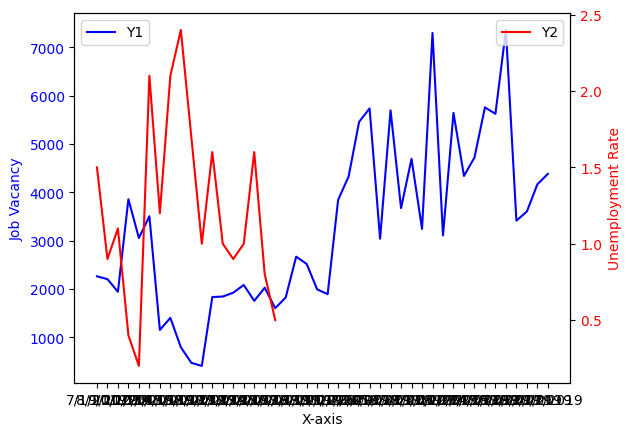

<Figure size 2000x1000 with 0 Axes>

In [270]:
# Create the first y-axis plot
fig, ax1 = plt.subplots()

# Plot the first dataset on the first y-axis
plt.figure(figsize=(20,10))
ax1.plot(df['Johor'], 'b', label='Y1')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Job Vacancy', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second dataset on the second y-axis
ax2.plot(df_unemployment['Johor'], 'r', label='Y2')
ax2.set_ylabel('Unemployment Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend for both datasets
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


# Job Vacancy in Malaysia

In [ ]:
# ETS prediction
Kedah_pred = ets_fore(df['Kedah'])
Pahang_pred = ets_fore(df['Pahang'])
Sabah_pred = ets_fore(df['Sabah'])
Selangor_pred = ets_fore(df['Selangor'])
Malaysia_pred = ets_fore(df['Total'])

# ARIMA prediction
Johor_pred = ARIMA_fore(df['Johor'])
kelantan_pred = ARIMA_fore(df['Kelantan'])
Melaka_pred = ARIMA_fore(df['Melaka'])
Negeri_Sembilan_pred = ARIMA_fore(df['Negeri Sembilan'])
Penang_pred = ARIMA_fore(df['Pulau Pinang'])
Perak_pred = ARIMA_fore(df['Perak'])
Perlis_pred = ARIMA_fore(df['Perlis'])
Sarawak_pred = ARIMA_fore(df['Sarawak'])
Terengganu_pred = ARIMA_fore(df['Terengganu'])
WP_Kuala_Lumpur_pred = ARIMA_fore(df['W.P Kuala Lumpur'])
WP_Labuan_pred = ARIMA_fore(df['W.P Labuan'])
WP_Putrajaya_pred = ARIMA_fore(df['W.P Putrajaya'])

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# Job Vacancy Rate Forecast

In [ ]:
# ETS prediction
VETS_Kedah = ets_fore(df['Kedah'])
VETS_Melaka = ets_fore(df['Melaka'])
VETS_Negeri_Sembilan = ets_fore(df['Negeri Sembilan'])
VETS_Pahang = ets_fore(df['Pahang'])
VETS_Perlis = ets_fore(df['Perlis'])
VETS_Terengganu = ets_fore(df['Terengganu'])
VETS_Sabah = ets_fore(df['Sabah'])
VETS_Sarawak = ets_fore(df['Sarawak'])
VETS_Putrajaya = ets_fore(df['W.P Putrajaya'])

# ARIMA prediction
VETS_Johor = ARIMA_fore(df['Johor'])
VETS_Kelantan = ARIMA_fore(df['Kelantan'])
VETS_Penang = ARIMA_fore(df['Pulau Pinang'])
VETS_Perak = ARIMA_fore(df['Perak'])
VETS_Selangor = ARIMA_fore(df['Selangor'])
VETS_Kuala_Lumpur = ARIMA_fore(df['W.P Kuala Lumpur'])
VETS_Labuan = ARIMA_fore(df['W.P Labuan'])
VETS_Total = ARIMA_fore(df['Total'])

# Model and Output

In [ ]:
def forecast_plot(state):
    state = state.title()
    if state == 'Kedah':
        pred = Kedah_pred
        fig, ax1 = plt.subplots()
        plt.figure(figsize=(12, 8))
        ax1.plot(df['Kedah'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.legend(loc='best')
        ax1.show()

        ax2 = ax1.twinx()
        ax2.plot(df_unemployment['Kedah'], 'r', label='Unemployment Rate')
        ax2.legend(loc='upper right')
        ax2.show()
        
    elif state == 'Pahang':
        pred = Pahang_pred
        plt.figure(figsize=(12, 8))
        ax1.plot(df['Pahang'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Pahang')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Sabah':
        pred = Sabah_pred
        ax1.figure(figsize=(12, 8))
        ax1.plot(df['Sabah'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Sabah')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Selangor':
        pred = Selangor_pred
        ax1.figure(figsize=(12, 8))
        ax1.plot(df['Selangor'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Selangor')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Johor':
        pred = Johor_pred
        ax1.figure(figsize=(12, 8))
        ax1.plot(df['Johor'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Johor')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Kelantan':
        pred = kelantan_pred
        plt.figure(figsize=(12, 8))
        ax1.plot(df['Kelantan'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Kelantan')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Melaka':
        pred = Melaka_pred
        ax1.figure(figsize=(12, 8))
        ax1.plot(df['Melaka'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Melaka')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Negeri Sembilan':
        pred = Negeri_Sembilan_pred
        plt.figure(figsize=(12, 8))
        ax1.plot(df['Negeri Sembilan'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Negeri Sembilan')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Pulau Pinang':
        pred = Penang_pred
        ax1.figure(figsize=(12, 8))
        ax1.plot(df['Pulau Pinang'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Pulau Pinang')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Perak':
        pred = Perak_pred
        ax1.figure(figsize=(12, 8))
        ax1.plot(df['Perak'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Perak')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Perlis':
        pred = Perlis_pred
        plt.figure(figsize=(12, 8))
        ax1.plot(df['Perlis'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Perlis')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Sarawak':
        pred = Sarawak_pred
        plt.figure(figsize=(12, 8))
        ax1.plot(df['Sarawak'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Sarawak')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Terengganu':
        pred = Terengganu_pred
        plt.figure(figsize=(12, 8))
        ax1.plot(df['Terengganu'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for Terengganu')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Kuala Lumpur':
        pred = WP_Kuala_Lumpur_pred
        plt.figure(figsize=(12, 8))
        ax1.plot(df['W.P Kuala Lumpur'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for W.P Kuala Lumpur')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Labuan':
        pred = WP_Labuan_pred
        plt.figure(figsize=(12, 8))
        ax1.plot(df['W.P Labuan'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for W.P Labuan')
        ax1.legend(loc='best')
        ax1.show()
    elif state == 'Putrajaya':
        pred = WP_Putrajaya_pred
        plt.figure(figsize=(12, 8))
        ax1.plot(df['W.P Putrajaya'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for W.P Putrajaya')
        ax1.legend(loc='best')
        ax1.show()
    else: 
        pred = Malaysia_pred
        plt.figure(figsize=(12, 8))
        ax1.plot(df['Total'], label='Actual')
        ax1.plot(pred, label='Forecast')
        ax1.title('forecast for W.P Putrajaya')
        ax1.legend(loc='best')
        ax1.show()


In [ ]:
forecast_plot("kedah")